# Correlation analysis for E.Coli dataset

In [2]:
genetic_code_RNA2AA = {'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
    'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
    'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'AUG': 'M',
    'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
    'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
    'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'UAU': 'Y', 'UAC': 'Y', 'UAG': 'X', 'UAA': 'X',
    'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'UGU': 'C', 'UGC': 'C',  'UGG': 'W', 'UGA':'X',
    'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'}

synonymous_codons = {
    'Alanine': ['GCT', 'GCC', 'GCA', 'GCG'],
    'Arginine': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'Asparagine': ['AAT', 'AAC'],
    'Aspartic acid': ['GAT', 'GAC'],
    'Cysteine': ['TGT', 'TGC'],
    'Glutamine': ['CAA', 'CAG'],
    'Glutamic acid': ['GAA', 'GAG'],
    'Glycine': ['GGT', 'GGC', 'GGA', 'GGG'],
    'Histidine': ['CAT', 'CAC'],
    'Isoleucine': ['ATT', 'ATC', 'ATA'],
    'Leucine': ['CTT', 'CTC', 'CTA', 'CTG', 'TTA', 'TTG'],
    'Lysine': ['AAA', 'AAG'],
    'Methionine': ['ATG'],  # Start codon as well
    'Phenylalanine': ['TTT', 'TTC'],
    'Proline': ['CCT', 'CCC', 'CCA', 'CCG'],
    'Serine': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'Threonine': ['ACT', 'ACC', 'ACA', 'ACG'],
    'Tryptophan': ['TGG'],
    'Tyrosine': ['TAT', 'TAC'],
    'Valine': ['GTT', 'GTC', 'GTA', 'GTG'],
    'STOP': ['TAA', 'TAG', 'TGA']  # Stop codons
}

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Bio.Seq import Seq

#load pandas
pandas_Data = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/DDLA_uniprot_sec_struct_04.csv')

def translate_RNA2prot(seqRNA):
    seqRNA = seqRNA.replace('T', 'U')
    lcod = list()
    for i in range(0, len(seqRNA), 3):
        lcod.append(f"{seqRNA[i]}{seqRNA[i+1]}{seqRNA[i+2]}")
    seqRNA = ''.join([genetic_code_RNA2AA[i] for i in lcod])
    return seqRNA


#### TRANSFORM PROTEIN SEQUENCE IN A DATABASE - FASTA FORMAT #####


with open('/Users/dominiquefastus/master_project/NuStru/nustruDB/DDLA_uniprot_sec_struct_04_filtered.fasta', 'w') as fdb:
    for row in pandas_Data.itertuples(index=False):
        id = row.primary_id
        protein_sequence = row.protein_sequence
        nucleotide_sequence = row.nucleotide_sequence
        if nucleotide_sequence[0:3] == 'ATG':
            if len(nucleotide_sequence) % 3 == 0:
                if nucleotide_sequence.count('A') + nucleotide_sequence.count('T') + nucleotide_sequence.count('G') + nucleotide_sequence.count('C') == len(nucleotide_sequence):
                    trad_RNA = translate_RNA2prot(nucleotide_sequence[0:-3]) #except stop codon
                    if protein_sequence == trad_RNA:
                        fdb.write(f">{id}\n{protein_sequence}\n")

In [3]:
import pandas as pd
import ast

nustru_data = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/NEW_ECOLI_FULL_uniprot_02_sec_struc_updated.csv', converters={'secondary_structure': ast.literal_eval}, nrows=120000)
nustru_data['secondary_structure'] = nustru_data['secondary_structure'].apply(lambda x: list(x.items()))

nustru_data['protein_sequence_start'], nustru_data['protein_sequence_between'], nustru_data['protein_sequence_end'] = nustru_data['protein_sequence'].str[:20], nustru_data['protein_sequence'].str[20:-20], nustru_data['protein_sequence'].str[-20:]
nustru_data['nucleotide_sequence_start'], nustru_data['nucleotide_sequence_between'], nustru_data['nucleotide_sequence_end'] = nustru_data['nucleotide_sequence'].str[:60], nustru_data['nucleotide_sequence'].str[60:-60], nustru_data['nucleotide_sequence'].str[-60:]

nustru_data['secstru_sequence_start'], nustru_data['secstru_sequence_between'], nustru_data['secstru_sequence_end'] = nustru_data['secondary_structure'].apply(lambda x: x[:20]), nustru_data['secondary_structure'].apply(lambda x: x[20:-20]), nustru_data['secondary_structure'].apply(lambda x: x[-20:])
nustru_data['secstru_sequence_start'], nustru_data['secstru_sequence_between'], nustru_data['secstru_sequence_end'] = nustru_data['secstru_sequence_start'].apply(lambda x: dict(x)), nustru_data['secstru_sequence_between'].apply(lambda x: dict(x)), nustru_data['secstru_sequence_end'].apply(lambda x: dict(x))
nustru_data['secondary_structure'] = nustru_data['secondary_structure'].apply(lambda x: dict(x))

In [134]:
print(nustru_data['secstru_sequence_start'][0].values())

dict_values(['-', '-', 'S', '-', 'S', 'S', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', '-', '-', '-', '-', '-'])


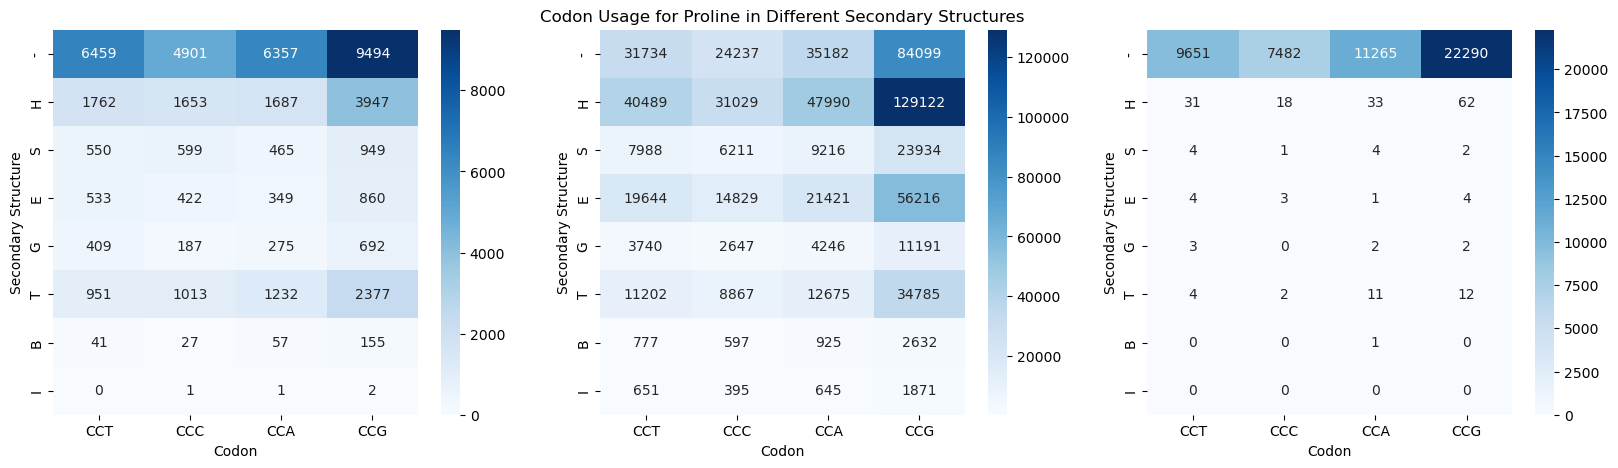

In [41]:
# Extending the analysis to all proteins in the dataset and plotting the results as a heat map
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import ast


aa_name = 'Proline'

# Analyze all entries in the dataset
def plot_codon_to_structure(nustru_data, aa_name, frame):
    codon_structure_counts = defaultdict(lambda: defaultdict(int))
    for _, row in nustru_data.iterrows():
        nucleotide_sequence = row[f'nucleotide_sequence_{frame}']
        secondary_structure_dict = row[f'secstru_sequence_{frame}']
        
        # Convert the nucleotide sequence to triplets (codons)
        codons = [nucleotide_sequence[i:i+3] for i in range(0, len(nucleotide_sequence), 3)]
        
        # Map each codon to its corresponding secondary structure, focusing on leucine codons
        total = 0
        for i, codon in enumerate(codons):
            for aa, codon_list in synonymous_codons.items():
                if aa == aa_name and codon in codon_list:
                    aa_pos = i + 1  # Amino acid positions are 1-based
                    structure = secondary_structure_dict.get(aa_pos, '-')
                    codon_structure_counts[codon][structure] += 1

    # Convert the counts to a DataFrame for visualization
    codon_structure_df = pd.DataFrame(codon_structure_counts).fillna(0)
    # total = codon_structure_df.sum().sum()
    # codon_structure_df = codon_structure_df / total * 100
    codon_structure_df= codon_structure_df[synonymous_codons[aa_name]]
    codon_structure_df = codon_structure_df.reindex(['-', 'H', 'S', 'E', 'G', 'T', 'B', 'I' ])
    codon_structure_df = codon_structure_df.fillna(0)

    return codon_structure_df

data1 = plot_codon_to_structure(nustru_data, aa_name=aa_name, frame='start')
data2 = plot_codon_to_structure(nustru_data, aa_name=aa_name, frame='between')
data3 = plot_codon_to_structure(nustru_data, aa_name=aa_name, frame='end')

y_axis_oder = ['']
x_axis_order = synonymous_codons[aa_name]
# Plotting the heat map
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.heatmap(data1, annot=True, cmap="Blues", fmt=".0f")
# plt.title(f'Codon Usage for {aa_name} in Different Secondary Structures')
plt.xlabel('Codon')
plt.ylabel('Secondary Structure')

plt.subplot(1, 3, 2)
sns.heatmap(data2, annot=True, cmap="Blues", fmt=".0f")
plt.title(f'Codon Usage for {aa_name} in Different Secondary Structures')
plt.xlabel('Codon')
plt.ylabel('Secondary Structure')

plt.subplot(1, 3, 3)
sns.heatmap(data3, annot=True, cmap="Blues", fmt=".0f")
# plt.title(f'Codon Usage for {aa_name} in Different Secondary Structures')
plt.xlabel('Codon')
plt.ylabel('Secondary Structure')

plt.savefig(f'/Users/dominiquefastus/master_project/NuStru/nustruDB/heatmap_{aa_name}.png')


In [43]:
aa_name = 'Leucine'

# Analyze all entries in the dataset
def plot_codon_to_structure(nustru_data, aa_name):
    codon_structure_counts = defaultdict(lambda: defaultdict(int))
    for _, row in nustru_data.iterrows():
        nucleotide_sequence = row[f'nucleotide_sequence_{frame
                                  ']
        secondary_structure_dict = row[f'secstru_sequence_{frame}']
        
        # Convert the nucleotide sequence to triplets (codons)
        codons = [nucleotide_sequence[i:i+3] for i in range(0, len(nucleotide_sequence), 3)]
        
        # Map each codon to its corresponding secondary structure, focusing on leucine codons
        total = 0
        for i, codon in enumerate(codons):
            for aa, codon_list in synonymous_codons.items():
                if aa == aa_name and codon in codon_list:
                    aa_pos = i + 1  # Amino acid positions are 1-based
                    structure = secondary_structure_dict.get(aa_pos, '-')
                    codon_structure_counts[codon][structure] += 1

    # Convert the counts to a DataFrame for visualization
    codon_structure_df = pd.DataFrame(codon_structure_counts).fillna(0)
    # total = codon_structure_df.sum().sum()
    # codon_structure_df = codon_structure_df / total * 100
    codon_structure_df= codon_structure_df[synonymous_codons[aa_name]]
    codon_structure_df = codon_structure_df.reindex(['-', 'H', 'S', 'E', 'G', 'T', 'B', 'I' ])
    codon_structure_df = codon_structure_df.fillna(0)

    return codon_structure_df

data1 = plot_codon_to_structure(nustru_data, aa_name=aa_name)

SyntaxError: f-string: expecting '}' (2998026661.py, line 8)

<Axes: xlabel='codon', ylabel='secondary_structure'>

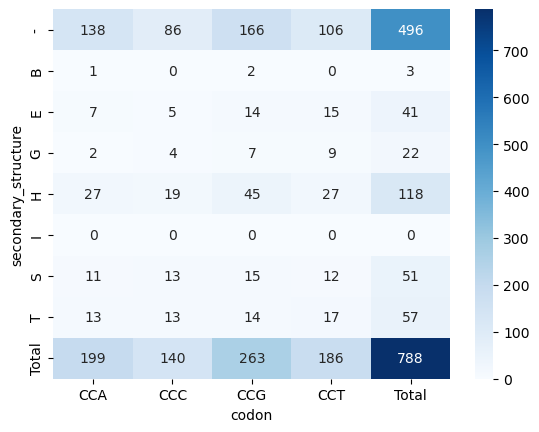

In [19]:
import numpy as np
data1_melted = data1.melt(ignore_index=False).reset_index()
data1_melted.columns = ['secondary_structure', 'codon', 'frequency']
ct_data1 = pd.crosstab(data1_melted['secondary_structure'], data1_melted['codon'], values=data1_melted['frequency'], aggfunc='sum', margins=True, margins_name='Total')
sns.heatmap(ct_data1, annot=True, cmap="Blues", fmt=".0f") 



In [44]:
# create a sample dataset
df = pd.DataFrame({
    'gender': ['male', 'male', 'female', 'female', 'male', 'female', 'male', 'female'],
    'education_level': ['high school', 'college', 'college', 'graduate', 'high school', 'graduate', 'college', 'graduate'],
    'score': [75, 82, 88, 95, 69, 92, 78, 85]
})

print(df)

   gender education_level  score
0    male     high school     75
1    male         college     82
2  female         college     88
3  female        graduate     95
4    male     high school     69
5  female        graduate     92
6    male         college     78
7  female        graduate     85


Text(95.72222222222221, 0.5, 'Secondary Structure')

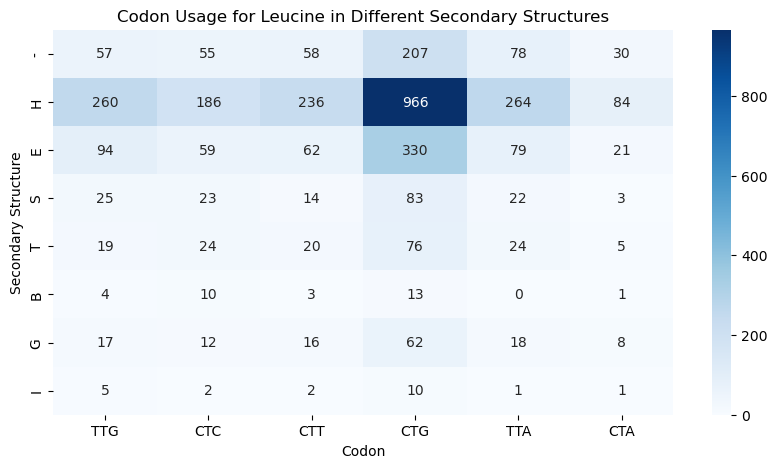

In [4]:
# Extending the analysis to all proteins in the dataset and plotting the results as a heat map
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import ast


aa_name = 'Leucine'

codon_structure_counts = defaultdict(lambda: defaultdict(int))


for _, row in nustru_data.head(100).iterrows():
    nucleotide_sequence = row['nucleotide_sequence']
    secondary_structure_dict = row['secondary_structure']
    
    # Convert the nucleotide sequence to triplets (codons)
    codons = [nucleotide_sequence[i:i+3] for i in range(0, len(nucleotide_sequence), 3)]
    
    # Map each codon to its corresponding secondary structure, focusing on leucine codons
    for i, codon in enumerate(codons):
        for aa, codon_list in synonymous_codons.items():
            if aa == aa_name and codon in codon_list:
                aa_pos = i + 1  # Amino acid positions are 1-based
                structure = secondary_structure_dict.get(aa_pos, '-')
                codon_structure_counts[codon][structure] += 1

# Convert the counts to a DataFrame for visualization
codon_structure_df = pd.DataFrame(codon_structure_counts).fillna(0)


# Plotting the heat map
plt.figure(figsize=(10, 5))
sns.heatmap(codon_structure_df, annot=True, cmap="Blues", fmt=".0f")
plt.title(f'Codon Usage for {aa_name} in Different Secondary Structures')
plt.xlabel('Codon')
plt.ylabel('Secondary Structure')


In [21]:
nustru_data = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/NEW_ECOLI_FULL_uniprot_02_sec_struc_updated.csv', nrows=100000)
nustru_data['secondary_structure'] = nustru_data['secondary_structure'].apply(ast.literal_eval)

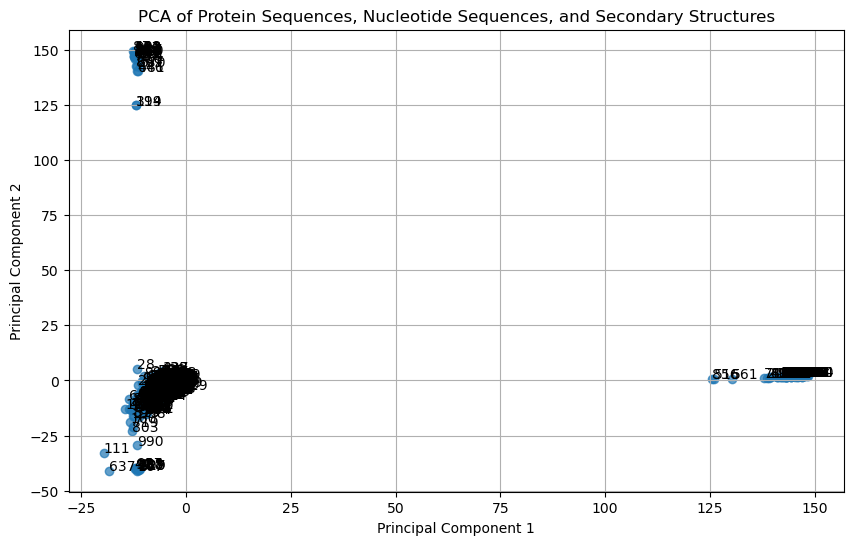

In [46]:
from collections import Counter
import numpy as np

# Function to calculate k-mer frequencies for sequences
def get_kmer_frequencies(sequence, k=3):
    k_mers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    total_kmers = len(k_mers)
    kmer_counts = Counter(k_mers)
    # Normalize by total number of k-mers to get frequency
    for kmer in kmer_counts:
        kmer_counts[kmer] /= total_kmers
    return kmer_counts

# Function to encode secondary structure into numerical format
def encode_secondary_structure(structure_dict):
    structure_counts = Counter(structure_dict.values())
    # Normalize by the total number of structures to get frequency
    total_structures = sum(structure_counts.values())
    for structure in structure_counts:
        structure_counts[structure] /= total_structures
    return structure_counts


# Select a small subset for demonstration
subset = nustru_data.head(1000)

# Calculate k-mer frequencies for protein and nucleotide sequences
k1 = 1
k2 = 9
protein_kmers = subset['protein_sequence'].apply(lambda x: get_kmer_frequencies(x, k1))
nucleotide_kmers = subset['nucleotide_sequence'].apply(lambda x: get_kmer_frequencies(x, k2))

# Encode secondary structures
secondary_structures = subset['secondary_structure'].apply(lambda x: encode_secondary_structure(x))

# Example output
protein_kmers.head(), nucleotide_kmers.head(), secondary_structures.head()

# Identify unique k-mers and secondary structure elements across the subset
all_protein_kmers = set().union(*[set(kmer.keys()) for kmer in protein_kmers])
all_nucleotide_kmers = set().union(*[set(kmer.keys()) for kmer in nucleotide_kmers])
all_structures = set().union(*[set(structure.keys()) for structure in secondary_structures])

# Initialize matrices for features
protein_kmer_matrix = np.zeros((len(protein_kmers), len(all_protein_kmers)))
nucleotide_kmer_matrix = np.zeros((len(nucleotide_kmers), len(all_nucleotide_kmers)))
secondary_structure_matrix = np.zeros((len(secondary_structures), len(all_structures)))

# Populate the matrices
for i, kmer_freq in enumerate(protein_kmers):
    for j, kmer in enumerate(all_protein_kmers):
        protein_kmer_matrix[i, j] = kmer_freq.get(kmer, 0)

for i, kmer_freq in enumerate(nucleotide_kmers):
    for j, kmer in enumerate(all_nucleotide_kmers):
        nucleotide_kmer_matrix[i, j] = kmer_freq.get(kmer, 0)
        
for i, structure_freq in enumerate(secondary_structures):
    for j, structure in enumerate(all_structures):
        secondary_structure_matrix[i, j] = structure_freq.get(structure, 0)

# Sizes of matrices
protein_kmer_matrix.shape, nucleotide_kmer_matrix.shape, secondary_structure_matrix.shape

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine the feature matrices
combined_features = np.hstack((protein_kmer_matrix, nucleotide_kmer_matrix, secondary_structure_matrix))

# Standardize the features before PCA
scaler = StandardScaler()
standardized_features = scaler.fit_transform(combined_features)

# Perform PCA
pca = PCA(n_components=2)  # Project down to 2 dimensions for visualization
principal_components = pca.fit_transform(standardized_features)

# Explained variance by the first two principal components
explained_variance = pca.explained_variance_ratio_

principal_components, explained_variance

import matplotlib.pyplot as plt

# Plotting the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.title('PCA of Protein Sequences, Nucleotide Sequences, and Secondary Structures')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Annotate points with their index for reference
for i, txt in enumerate(subset.index):
    plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]))

plt.show()



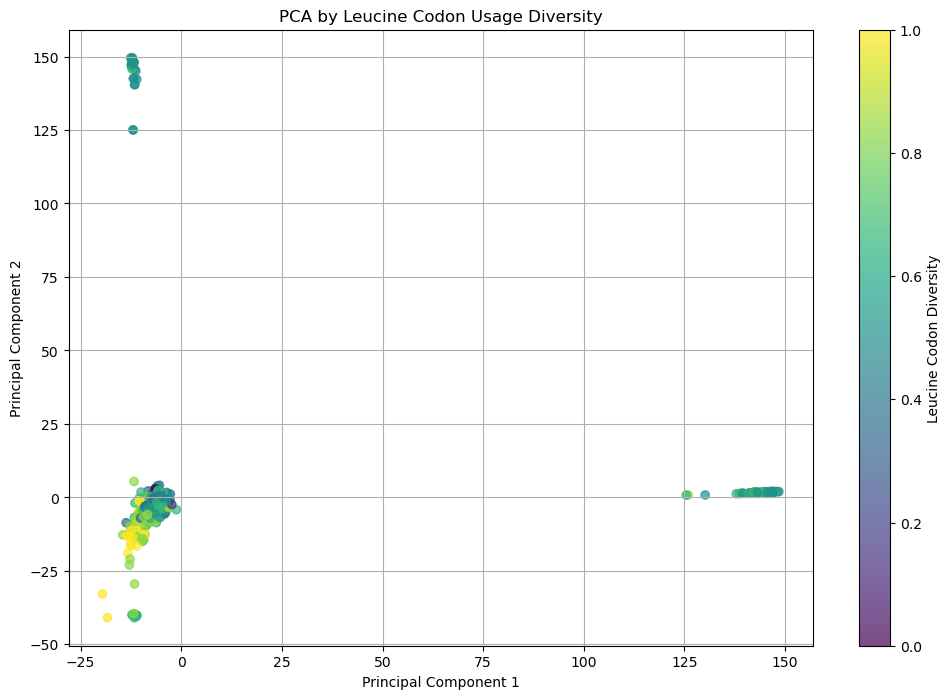

In [48]:
# Function to calculate codon usage diversity for a given amino acid in a nucleotide sequence
def codon_usage_diversity(nucleotide_sequence, amino_acid_codons):
    # Find all codons in the sequence
    codons_in_sequence = [nucleotide_sequence[i:i+3] for i in range(0, len(nucleotide_sequence), 3)]
    # Filter codons that correspond to the given amino acid
    relevant_codons = [codon for codon in codons_in_sequence if codon in amino_acid_codons]
    # Calculate diversity as the number of unique codons used
    diversity_score = len(set(relevant_codons))
    return diversity_score

leucine_codons = synonymous_codons['Arginine']


leucine_diversity_scores = subset['nucleotide_sequence'].apply(lambda x: codon_usage_diversity(x, leucine_codons))

# Normalize scores for coloring
leucine_diversity_normalized = (leucine_diversity_scores - leucine_diversity_scores.min()) / (leucine_diversity_scores.max() - leucine_diversity_scores.min())

# Plotting with leucine codon diversity indicated by color
plt.figure(figsize=(12, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=leucine_diversity_normalized, cmap='viridis', alpha=0.7)

plt.title('PCA by Leucine Codon Usage Diversity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Leucine Codon Diversity')
plt.grid(True)
plt.savefig('/Users/dominiquefastus/master_project/NuStru/nustruDB/PCA_leucine_codon_diversity.png')


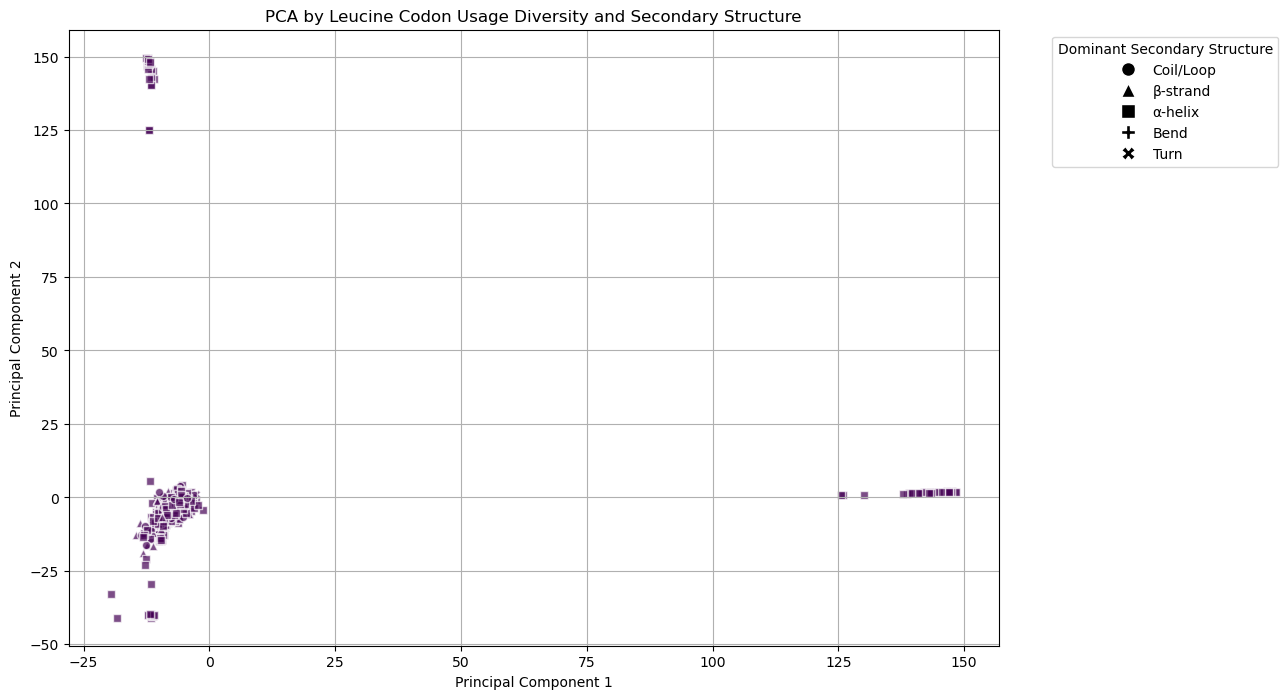

In [50]:
# Function to determine the dominant secondary structure for a sequence
def dominant_secondary_structure(structure_dict):
    structure_counts = Counter(structure_dict.values())
    dominant_structure = structure_counts.most_common(1)[0][0]
    return dominant_structure

# Calculate the dominant secondary structure for each sequence
dominant_structures = subset['secondary_structure'].apply(lambda x: dominant_secondary_structure(x))

# Mapping of secondary structures to marker shapes
structure_to_marker = {'-': 'o', 'E': '^', 'H': 's', 'C': 'o', 'S': 'P', 'T': 'X'}
markers = [structure_to_marker.get(structure, 'o') for structure in dominant_structures]

# Plotting with leucine codon diversity and dominant secondary structure indicated
plt.figure(figsize=(12, 8))
for i, (pc1, pc2) in enumerate(principal_components):
    plt.scatter(pc1, pc2, c=[leucine_diversity_normalized[i]], cmap='viridis', marker=markers[i], alpha=0.7, edgecolors='w')

# Custom legend for secondary structures
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Coil/Loop', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='β-strand', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='α-helix', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='P', color='w', label='Bend', markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='X', color='w', label='Turn', markerfacecolor='k', markersize=10)]
plt.legend(handles=legend_elements, title="Dominant Secondary Structure", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('PCA by Leucine Codon Usage Diversity and Secondary Structure')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Leucine Codon Diversity')
plt.grid(True)
plt.savefig('/Users/dominiquefastus/master_project/NuStru/nustruDB/PCA_leucine_codon_diversity_secondary_structure.png')


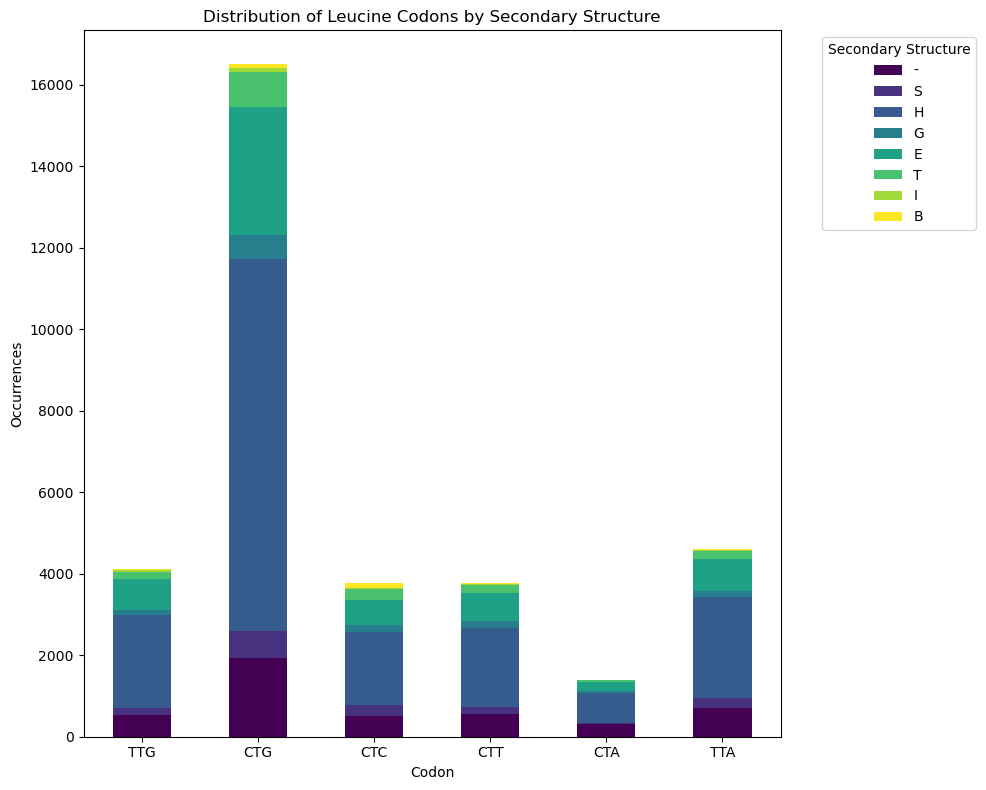

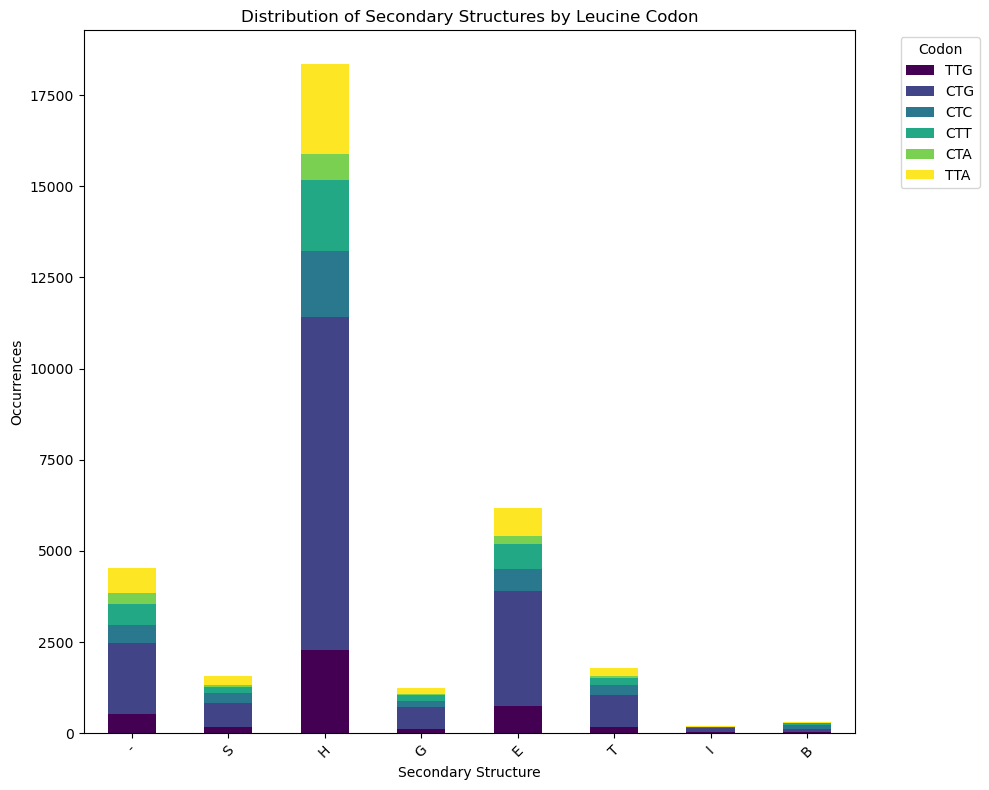

In [6]:
# Import necessary libraries for data manipulation
from collections import defaultdict

# Define the codons for leucine
leucine_codons = synonymous_codons['Leucine']

def find_codons(protein_sequence, nucleotide_sequence, amino_acid):
    codons = []
    # The codon for each amino acid is determined by its position in the protein sequence
    for i, aa in enumerate(protein_sequence):
        if aa == amino_acid:
            # Extract the codon from the nucleotide sequence
            codon_start = i * 3
            codon = nucleotide_sequence[codon_start:codon_start+3]
            codons.append((i+1, codon)) # Store position (1-indexed) and codon
    return codons

codon_occurrences = defaultdict(lambda: defaultdict(int))

# Process each row in the data
for index, row in nustru_data.head(1000).iterrows():
    # Find leucine codons in the nucleotide sequence
    leucine_positions_codons = find_codons(row['protein_sequence'], row['nucleotide_sequence'], 'L')
    # Convert the string representation of dictionaries to actual dictionaries
    secondary_structure_dict = row['secondary_structure']
    # Count occurrences of each codon in each secondary structure type
    for position, codon in leucine_positions_codons:
        if codon in leucine_codons:
            sec_struct = secondary_structure_dict.get(position, '-')
            codon_occurrences[sec_struct][codon] += 1

# Convert the occurrences dictionary to a DataFrame for easier plotting
codon_df = pd.DataFrame(codon_occurrences).fillna(0)

codon_df

import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
codon_df.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
plt.title('Distribution of Leucine Codons by Secondary Structure')
plt.xlabel('Codon')
plt.ylabel('Occurrences')
plt.xticks(rotation=0)
plt.legend(title='Secondary Structure', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# To plot the secondary structures on the x-axis and the codons as stacked bars, we need to transpose the dataframe
codon_df_transposed = codon_df.T

# Plotting the transposed data
fig, ax = plt.subplots(figsize=(10, 8))
codon_df_transposed.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
plt.title('Distribution of Secondary Structures by Leucine Codon')
plt.ylabel('Occurrences')
plt.xlabel('Secondary Structure')
plt.xticks(rotation=45)
plt.legend(title='Codon', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('/Users/dominiquefastus/master_project/NuStru/nustruDB/leucine_codon_distribution.png')


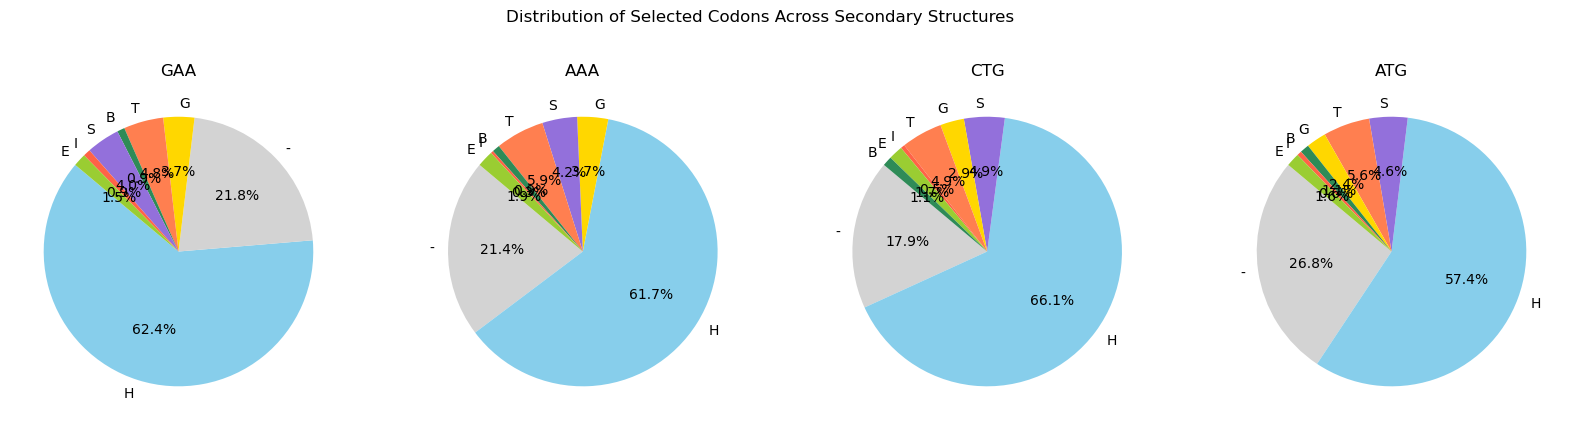

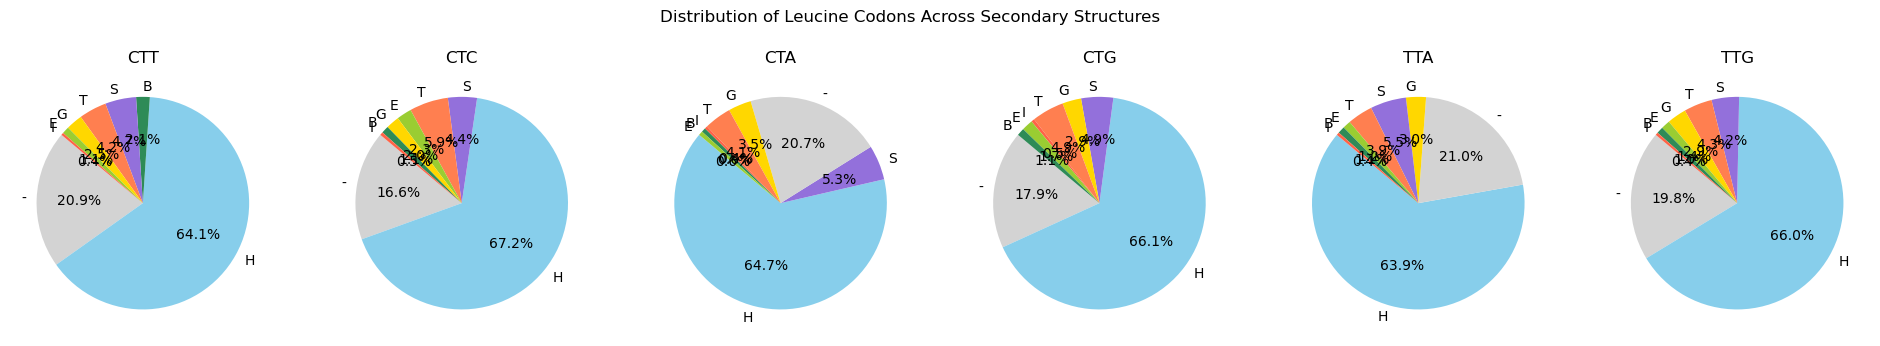

In [26]:
from collections import Counter

def codon_to_secondary_structure(nucleotide_sequence, secondary_structure_dict):
    codon_structure_counts = Counter()
    # Iterating over the nucleotide sequence in steps of 3 to get codons
    for i in range(0, len(nucleotide_sequence), 3):
        codon = nucleotide_sequence[i:i+3]
        # Assuming the first nucleotide of the codon defines its secondary structure
        structure = secondary_structure_dict.get(i//3 + 1, '-')
        codon_structure_counts[(codon, structure)] += 1
    return codon_structure_counts


example_data = nustru_data.head(1000)
codon_structure_counts_example = Counter()

for _, row in example_data.iterrows():
    codon_structure_counts = codon_to_secondary_structure(row['nucleotide_sequence'], secondary_structure_dict)
    codon_structure_counts_example += codon_structure_counts

codon_structure_counts_example.most_common(10)

# Process the entire dataset
codon_structure_counts_total = Counter()

for _, row in example_data.iterrows():
    codon_structure_counts = codon_to_secondary_structure(row['nucleotide_sequence'], secondary_structure_dict)
    codon_structure_counts_total += codon_structure_counts


selected_codons = ['GAA', 'AAA', 'CTG', 'ATG']

# Prepare the data for pie charts
pie_chart_data = {codon: Counter() for codon in selected_codons}

for (codon, structure), count in codon_structure_counts_total.items():
    if codon in selected_codons:
        pie_chart_data[codon][structure] += count

pie_chart_data

import matplotlib.pyplot as plt

# Function to plot pie charts for the selected codons
def plot_pie_charts(pie_chart_data):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle('Distribution of Selected Codons Across Secondary Structures')

    for i, (codon, counts) in enumerate(pie_chart_data.items()):
        labels = counts.keys()
        sizes = counts.values()
        colors = [color_map[label] for label in labels]
        axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,  colors=colors)
        axs[i].set_title(codon)

    plt.show()

plot_pie_charts(pie_chart_data)


leucine_codons = synonymous_codons['Leucine']


pie_chart_data_leucine = {codon: Counter() for codon in leucine_codons}

for (codon, structure), count in codon_structure_counts_total.items():
    if codon in leucine_codons:
        pie_chart_data_leucine[codon][structure] += count

pie_chart_data_leucine

color_map = {
    'H': 'skyblue',  # Alpha-helices
    'E': 'yellowgreen',  # Beta-strands
    'T': 'coral',  # Turns
    '-': 'lightgrey',  # Regions without a defined structure
    'S': 'mediumpurple',  # Coils
    'G': 'gold',  # 3_10 helices
    'I': 'tomato',  # Pi helices
    'B': 'seagreen'  # Isolated beta-bridge
}

# Adjusted function to plot pie charts with consistent colors for secondary structures
def plot_pie_charts_leucine_colored(pie_chart_data, color_map):
    fig, axs = plt.subplots(1, len(pie_chart_data), figsize=(24, 4))  # Adjust the subplot size
    fig.suptitle('Distribution of Leucine Codons Across Secondary Structures')

    for i, (codon, counts) in enumerate(pie_chart_data.items()):
        labels = counts.keys()
        sizes = counts.values()
        colors = [color_map[label] for label in labels]
        axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
        axs[i].set_title(codon)

    plt.show()

plot_pie_charts_leucine_colored(pie_chart_data_leucine, color_map)



In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Simplify the secondary structure information: Only keep 'H', 'E', or '-' (none)
def simplify_structure(struct_dict):
    simplified = []
    for pos, struct in struct_dict.items():
        if struct in ['H', 'E']:
            simplified.append(struct)
        else:
            simplified.append('-')  # Treat all other structures as 'none'
    return simplified


def encode_sequence(seq, segment_length=9):  # Using 9 as an arbitrary segment length for this example
    nucleotide_mapping = {'A': 0, 'T': 1, 'G': 2, 'C': 3}
    encoded = [nucleotide_mapping.get(nuc, 0) for nuc in seq]  # Default to 0 ('A') if nucleotide is unknown
    # Break down into segments
    segments = [encoded[i:i+segment_length] for i in range(0, len(encoded) - segment_length + 1, 3)]  # Step by 3 to simulate codons
    return segments

# Prepare dataset
X = []  # Features (encoded nucleotide segments)
y = []  # Labels (simplified secondary structure)

for index, row in nustru_data.head(1000).iterrows():
    struct_dict = row['secondary_structure']
    simplified_struct = simplify_structure(struct_dict)
    segments = encode_sequence(row['nucleotide_sequence'])
    segment_struct = simplified_struct[:len(segments)]  # Ensure the structure labels match segment count
    X.extend(segments)
    y.extend(segment_struct)

# Convert lists to arrays for machine learning processing
X = np.array(X)
y = np.array(y)

# Due to the simplification and limitations, let's further reduce the problem to predicting 'H' (helix) vs others
y = np.where(y == 'H', 'H', 'Other')

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, report


(0.6893528701093522,
 '              precision    recall  f1-score   support\n\n           H       0.64      0.60      0.62     26972\n       Other       0.72      0.75      0.74     37590\n\n    accuracy                           0.69     64562\n   macro avg       0.68      0.68      0.68     64562\nweighted avg       0.69      0.69      0.69     64562\n')

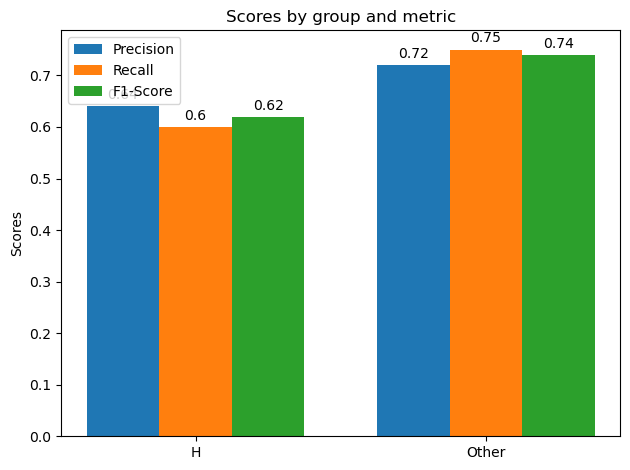

In [15]:
import matplotlib.pyplot as plt

# Extracted metrics from the model output
metrics = {
    'H': {'precision': 0.64, 'recall': 0.60, 'f1-score': 0.62},
    'Other': {'precision': 0.72, 'recall': 0.75, 'f1-score': 0.74}
}

# Categories for the plot
categories = list(metrics.keys())
precision = [metrics[cat]['precision'] for cat in categories]
recall = [metrics[cat]['recall'] for cat in categories]
f1_score = [metrics[cat]['f1-score'] for cat in categories]

# Number of categories
n_categories = len(categories)

# The x locations for the groups
ind = np.arange(n_categories)  
width = 0.25       

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, precision, width, label='Precision')
rects2 = ax.bar(ind, recall, width, label='Recall')
rects3 = ax.bar(ind + width, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and metric')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [32]:
import pandas as pd
from Bio.Seq import Seq

#load pandas
pandas_Data = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/NEW_ECOLI_FULL_uniprot_02_sec_struc_updated.csv', nrows=10000)



def translate_RNA2prot(seqRNA):
    seqRNA = seqRNA.replace('T', 'U')
    lcod = list()
    for i in range(0, len(seqRNA), 3):
        lcod.append(f"{seqRNA[i]}{seqRNA[i+1]}{seqRNA[i+2]}")
    seqRNA = ''.join([genetic_code_RNA2AA[i] for i in lcod])
    return seqRNA

with open('/Users/dominiquefastus/master_project/NuStru/nustruDB/ECOLI_seq_end_prot.fasta', 'w') as fdb1, open('/Users/dominiquefastus/master_project/NuStru/nustruDB/ECOLI_seq_end_nt.fasta', 'w') as fdb2:
    for row in pandas_Data.itertuples(index=False):
        id = row.primary_id
        protein_sequence = row.protein_sequence
        nucleotide_sequence = row.nucleotide_sequence
        if nucleotide_sequence[0:3] == 'ATG':
            if len(nucleotide_sequence) % 3 == 0:
                if nucleotide_sequence.count('A') + nucleotide_sequence.count('T') + nucleotide_sequence.count('G') + nucleotide_sequence.count('C') == len(nucleotide_sequence):
                    trad_RNA = translate_RNA2prot(nucleotide_sequence[0:-3]) #except stop codon
                    if protein_sequence == trad_RNA:
                        fdb1.write(f">{id}\n{protein_sequence}\n")
                        fdb2.write(f">{id}\n{nucleotide_sequence}\n")